In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 110 GB / percent used: 12.1 %


In [4]:
# Define period
period = slice('1981','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

# Variable
var = 'prsn'
table = u.get_table(var)
label, units, cmap, levels = u.get_var_infos(var)

# Load model data
http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/ta-global_multimodel/list_models.ipynb

In [38]:
# list_models = ['ACCESS-CM2', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAS-ESM2-0', 'CESM2-FV2', 'CESM2-WACCM-FV2', 'CanESM5', 'E3SM-1-0', 'E3SM-1-1', 'E3SM-1-1-ECA', 'EC-Earth3-Veg', 'EC-Earth3-Veg-LR', 'FGOALS-f3-L', 'FGOALS-g3', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM6A-LR', 'MCM-UA-1-0', 'MIROC6', 'MPI-ESM-1-2-HAM', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorCPM1', 'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON']
list_models = ['BCC-CSM2-MR', 'BCC-ESM1', 'ACCESS-CM2', 'CESM2-FV2', 'ACCESS-CM2', 'CESM2-WACCM-FV2', 'CanESM5', 'EC-Earth3-Veg', 'FGOALS-f3-L', 'GFDL-CM4', 'GISS-E2-1-G', 'GISS-E2-1-G-CC', 'GISS-E2-1-H', 'IPSL-CM6A-LR', 'MIROC6', 'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorCPM1', 'NorESM2-LM', 'SAM0-UNICON']

realization = 'r1i1p1f1'

clim = []

for model in list_models:
    print(model)
    institute, grid = u.select_model(model, var)
    
    da = xr.open_mfdataset(
        '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/'+realization+'/'+table+'/'+var+'/'+grid+'/latest/*.nc', combine='by_coords'
    ).sel(time=period)[var]
    
    model_clim = u.clim(da) * 86400
    
    
    if model in ['MCM-UA-1-0']:
        model_clim = model_clim.rename({'longitude': 'lon', 'latitude': 'lat'})
    
    clim.append(model_clim)

BCC-CSM2-MR
BCC-ESM1
ACCESS-CM2
CESM2-FV2


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'prsn' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


ACCESS-CM2
CESM2-WACCM-FV2


/data/mlalande/miniconda3/envs/work/lib/python3.8/site-packages/xarray/conventions.py:487: SerializationWarning: variable 'prsn' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


CanESM5
EC-Earth3-Veg
FGOALS-f3-L
GFDL-CM4
GISS-E2-1-G
GISS-E2-1-G-CC
GISS-E2-1-H
IPSL-CM6A-LR
MIROC6
MPI-ESM1-2-HR
MPI-ESM1-2-LR
MRI-ESM2-0
NorCPM1
NorESM2-LM
SAM0-UNICON


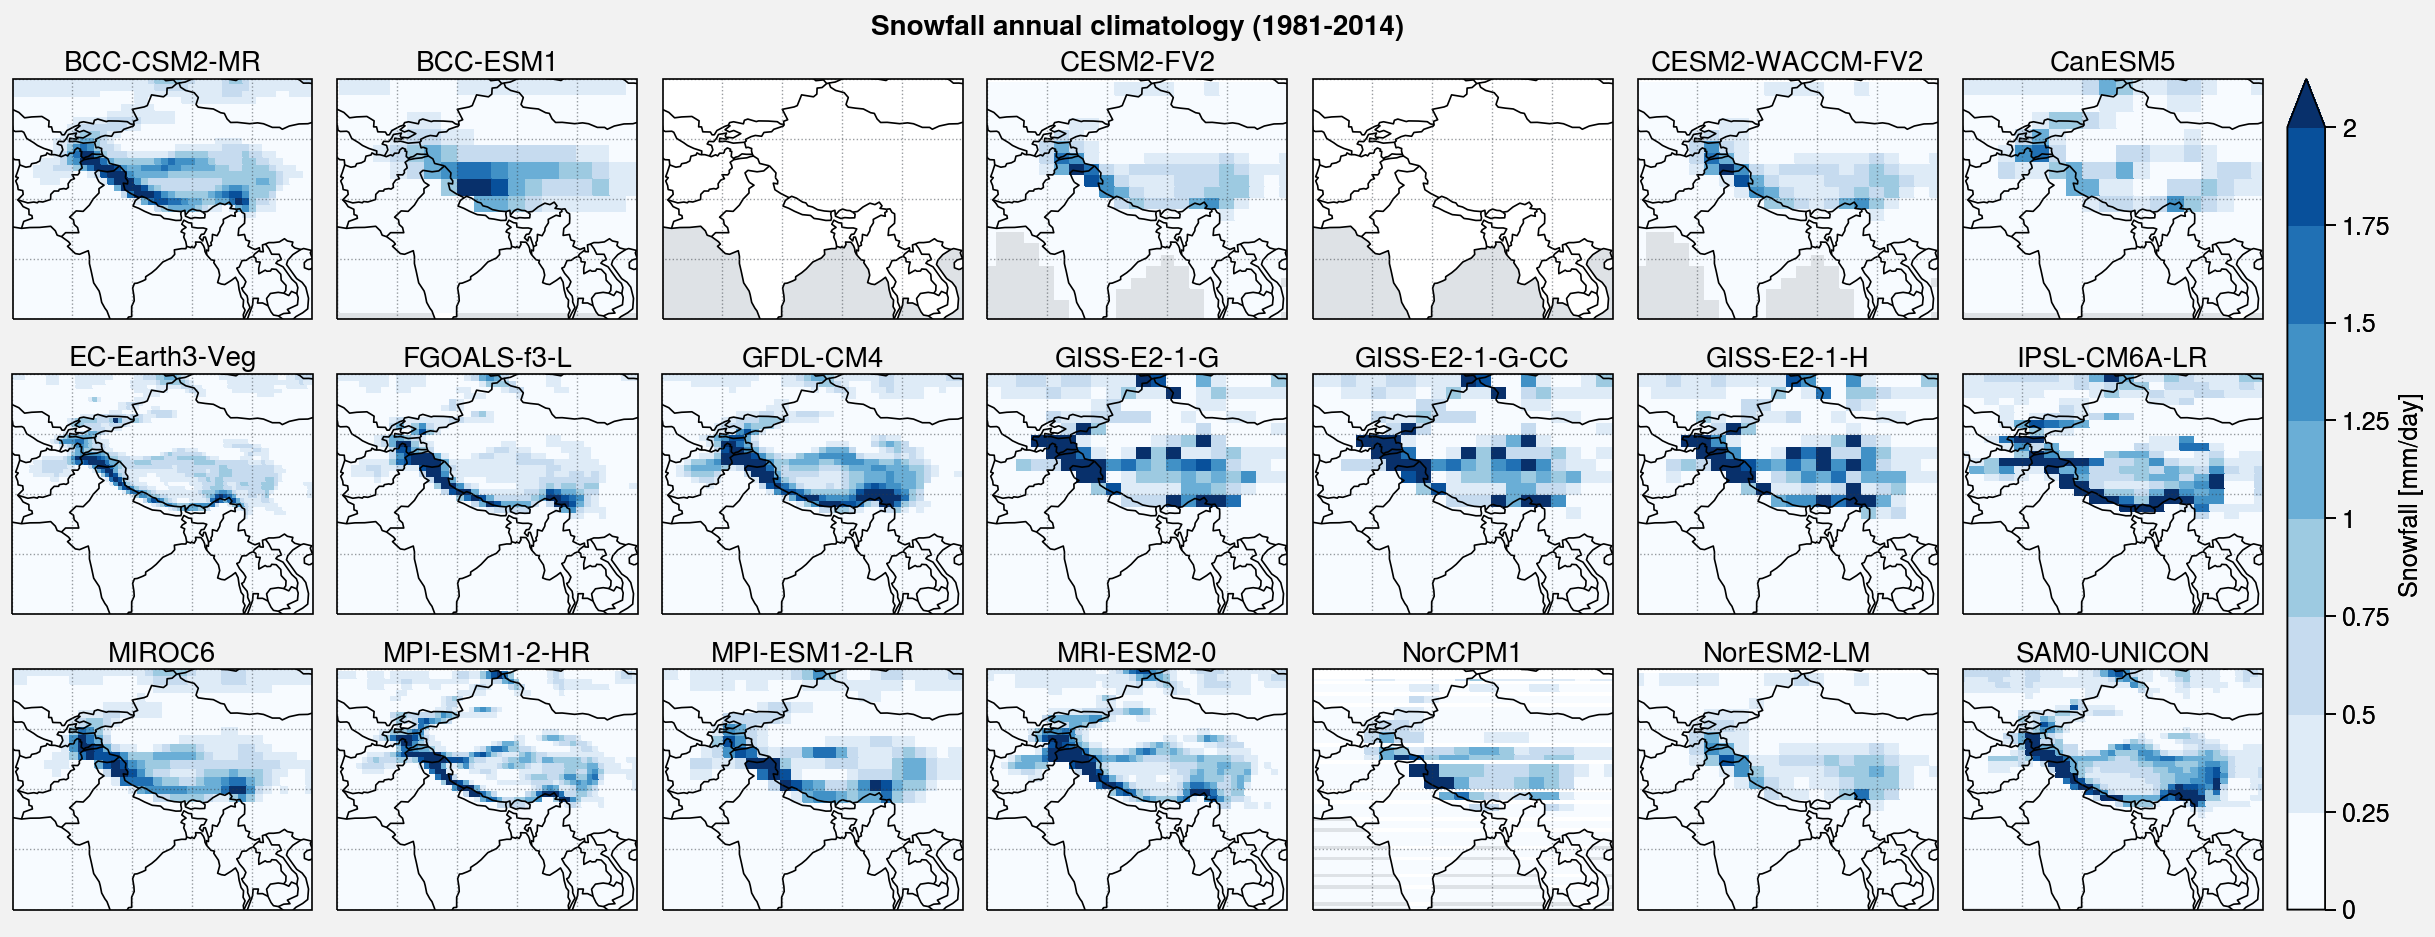

In [40]:
cmap_bias = 'Blues'
levels_bias = plot.arange(0,2,0.25)
extend_bias = 'max'

f, axs = plot.subplots(proj='cyl', ncols=7, nrows=3, axwidth=1.5)

for i, ax in enumerate(axs):
    if not list_models[i] == 'ACCESS-CM2':
        #Plot
        m = axs[i].pcolormesh(
            clim[i].sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])), 
            cmap=cmap_bias, levels=levels_bias, extend=extend_bias
        )
        axs[i].format(title=list_models[i])
    
f.colorbar(m, label=label + ' ['+units+']', loc='r')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=False, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle=label+" annual climatology ("+period.start+"-"+period.stop+")",
    lonlines=10, latlines=10, abc=False, latlim=latlim, lonlim=lonlim
)

f.save('img/'+var+'_multimodel.jpg')